[0.84969786 0.89176814 0.79955379 0.92243518 0.90290894 0.87680318
 0.89413005 0.85584334 0.92421106 0.87327326]
R^2 Value: 0.883700626125059
Root Mean Squared Error: 27108.886814532023


Text(0, 0.5, 'Predictions')

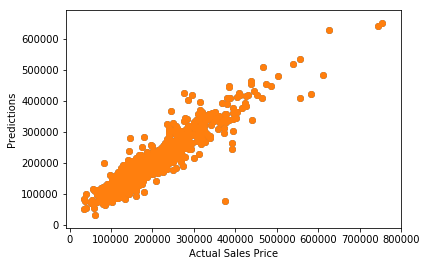

In [6]:
import pandas as pd
import seaborn as sb
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import *
from sklearn.model_selection import cross_val_score, cross_val_predict
# Multiple Regression using Backward Elimination and Cross_Val

# df = pd.read_csv('train_adjusted.csv')
df = pd.read_csv('train_adjusted.csv')
columns = list(df.columns.values)


# train all columns
x = df[['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fire2laces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch']]

x = x.astype(np.float64)

# y = df.iloc[:, lambda df: [38]].values
y = np.ravel(df[['SalePrice']])


poly = PolynomialFeatures(degree=2,include_bias=False)
x = poly.fit_transform(x)
sds =  StandardScaler()
x = sds.fit_transform(x)


model = BayesianRidge()
model.fit(x,y)

#Super Champ
# R^2 Value: 0.9028012882251895
# Root Mean Squared Error: 24782.964256275893

scores = cross_val_score(model, x, y, cv = 10)
print(scores)

predictions = cross_val_predict(model, x, y, cv = 10)
plt.scatter(y, predictions)

coeff = metrics.r2_score(y, predictions)
print("R^2 Value:", coeff)

rmse = np.sqrt(mean_squared_error(predictions,y))
print('Root Mean Squared Error:', rmse)

plt.scatter(y,predictions)
plt.xlabel("Actual Sales Price")
plt.ylabel("Predictions")

In [7]:
import pickle

In [8]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [22]:
x_dict = {
    'Labor': 6,
    'Potato': 10,
    'Lava': 100
}
cols = ['Labor','Lava','Potato']

In [23]:
# df = pd.DataFrame(list(x_dict.values()),columns=list(x_dict.keys()))

In [34]:
vals = np.array([[x_dict[col] for col in cols]])

In [33]:
np.expand_dims(vals, axis=0)

array([[  6, 100,  10]])

In [36]:
vals.shape

(1, 3)

In [39]:
x.shape

(1457, 170)

In [41]:
with open('saved_poly.pkl','wb') as f:
    pickle.dump(poly,f)

In [48]:
orig = df[['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fire2laces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch']]
type(orig.iloc[0])

pandas.core.series.Series

In [51]:
test = poly.transform([orig.iloc[0]])
test = sds.transform(test)
model.predict(test)

array([207098.37800775])